# Deep Learning
    

## Setup

We will use Keras/Tensorflow. These require older versions of python, so we will need to use an different conda environment. You can set this up with
```
conda create --name 8.s05_dl python=3.6
conda install numpy matplotlib scipy jupyter keras scikit-learn pandas
conda activate 8.s05_dl
``` 
(you can get out of the existing environment, if necessary, with `conda deactivate`).

Let's check that everything is working:

In [2]:
import keras
print(keras.__version__)

2.3.1


You should see the keras version printed properly.

## Machine Learning

Machine learning (ML) broadly describes the methods by which computers are able to learn mathematical models to describe data. If this sounds a little familiar don't be surprised: ML at its core is fitting.

ML involves three main components:

- Model
    - chosen mathematical model (depends on the task / available data)
- Learning
    - estimate statistical model from data 
- Prediction/Inference
    - use statistical model to make predictions on new data points and infer properties

### Supervised Learning

Given N examples with features ${x_i\in X}$ and targets ${y_i\in Y}$, learn function mapping $h(x)=y$.

#### Classification

In classification tasks, $Y$ is a finite set of labels (i.e. classes). Can be:

- Binary classification ($Y={0,1}$) e.g. signal vs. background

- Multi-class classification $Y={c_1,c_2,...,c_n}$) e.g. is this particle an electron or pion or photon?
    - Multi-class labels are typically represented using "one-hot-encoding" or "one-hot-vectors": $y_i=(0,0,...,1,...,0)$ where the kth element is 1 and all other are 0 for class $c_k$.

#### Regression

In regression tasks, $Y$ is the real numbers

#### Procedure

- Design a function (model) with adjustable parameters
- Design a loss function
- Find best parameters which minimize loss
    - Use a labeled *training-set* to compute loss
    - Adjust parameters to reduce loss function
    - Repeat until parameters stabilize (minima)
- Estimate final performance on *test-set*


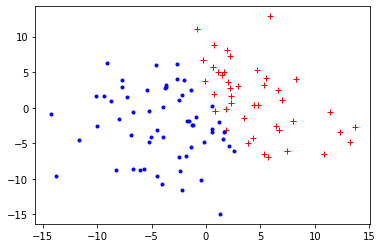

In [3]:
import numpy as np
import matplotlib.pyplot as plt

#define points
x1 = np.random.normal(0, 5, 100) #mean, sigma, num_points
x2 = np.random.normal(0, 5, 100)

noise = 0. #sets the noise scale
x1noise = np.random.normal(0, noise, 100)
x2noise = np.random.normal(0, noise, 100)

mask_pos = x2 > (2. - 3.*x1)
mask_neg = x2 <= (2. - 3.*x1)

x1 = x1 + x1noise
x2 = x2 + x2noise

# lets define a true boundary between the two classes
# by x_2 = 2 - 3 x_1
x1_pos = x1[mask_pos]
x2_pos = x2[mask_pos]
x1_neg = x1[mask_neg]
x2_neg = x2[mask_neg]

#look at things
plt.plot(x1_pos, x2_pos, 'r+')
plt.plot(x1_neg, x2_neg, 'b.')

plt.show()

#### Ex. 1 : Perceptron Algorithm

Basic classification: two inputs, two classes

Linear model: $f(x|w,b) = \textrm{sign}(w^{T}x+b)$

Loss: $L_i = \textrm{max}[0,-y_i f(x_i|w,b)]$,  $y_i\in{-1,+1}$

Issue: No way to distinguish two solutions. Is $x_2 = 2 - 3.001 x_1$ a better solution that $x_2 = 2 - 3 x_1$ in this case?

In [4]:
def perceptron_loss(x,y,w,b):
    loss = 0.
    for i in range(len(x[0])):
        fm = np.sign(x[0][i]*w[0]+x[1][i]*w[1]+b)
        loss = loss + max(0.,-1.*y[i]*fm)
    return loss

x_list = [np.concatenate((x1_pos,x1_neg)),np.concatenate((x2_pos,x2_neg))]
y_list = [1.]*len(x1_pos) + [-1.]*len(x1_neg)

print("Perceptron loss (w1=3, w2=1, b=-2)")
print(perceptron_loss(x_list,y_list,[3.,1.],-2.))
print("Perceptron loss (w1=3, w2=1, b=-1.9)")
print(perceptron_loss(x_list,y_list,[3.,1.],-1.9))
print("Perceptron loss (w1=3, w2=1, b=-2.1)")
print(perceptron_loss(x_list,y_list,[3.,1.],-2.1))

Perceptron loss (w1=3, w2=1, b=-2)
0.0
Perceptron loss (w1=3, w2=1, b=-1.9)
1.0
Perceptron loss (w1=3, w2=1, b=-2.1)
1.0


#### Ex. 2 : Support Vector Machine

Similar to perceptron algorithm, modify loss to select maximally discriminant parameters:

Linear model: $f(x|w,b) = w^{T}x+b$
Classifier: $\textrm{sign}(f(x|w,b))$

Loss: $L_i = \textrm{max}[0,1-y_i f(x_i|w,b)]$,  $y_i\in{-1,+1}$


In [5]:
def svm_loss(x,y,w,b):
    loss = 0.
    for i in range(len(x[0])):
        fm = x[0][i]*w[0]+x[1][i]*w[1]+b
        loss = loss + max(0.,1.-1.*y[i]*fm)
    return loss

print("SVM loss (w1=3, w2=1, b=-2)")
print(svm_loss(x_list,y_list,[3.,1.],-2.))
print("SVM loss (w1=3, w2=1, b=-1.9)")
print(svm_loss(x_list,y_list,[3.,1.],-1.9))
print("SVM loss (w1=3, w2=1, b=-2.1)")
print(svm_loss(x_list,y_list,[3.,1.],-2.1))

SVM loss (w1=3, w2=1, b=-2)
4.555527145951242
SVM loss (w1=3, w2=1, b=-1.9)
4.755527145951241
SVM loss (w1=3, w2=1, b=-2.1)
4.355527145951241


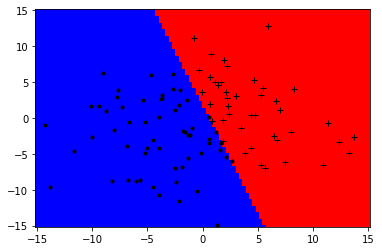

In [6]:
#create grid
x1_list = np.linspace(-15., 15., 100)
x2_list = np.linspace(-15., 15., 100)
x1_grid, x2_grid  = np.meshgrid(x1_list, x2_list)

#fill with model value
h_grid = np.sign(x2_grid - (2. - 3.*x1_grid))

#draw 2d mesh
plt.pcolormesh(x1_grid, x2_grid, h_grid, cmap = 'bwr', shading='auto')

plt.plot(x1_pos, x2_pos, 'k+')
plt.plot(x1_neg, x2_neg, 'k.')

plt.show()

Better... but what we really want is a probabilistic model. For data points we haven't seen, and more complex data, we want the algorithm to produce its confidence in the prediction.


#### Ex. 3 : Logistic regression

Change from \[-1,1\] to \[0,1\] for simplicity

Model: $f(x|w,b)=\frac{1}{1+e^{-(w^{T}x+b)}}$

Loss: $L_i = y_i \log(f(x_i|w,b)) + (1-y_i)\log(1-f(x_i|w,b))$

In [7]:
#switch to [0,1] from [-1,1]

y_list_0 = [1.]*len(x1_pos) + [0.]*len(x1_neg)

def lr_loss(x,y,w,b,scale=1.):
    loss = 0.
    for i in range(len(x[0])):
        expon = -1.*scale*(x[0][i]*w[0]+x[1][i]*w[1]+b)
        if (expon > 99.):
            expon = 99.
        fm = 1./(1.+np.exp(expon))
        if (fm < 1. and fm > 0.):
            loss = loss - y[i]*np.log(fm) - (1.-y[i])*np.log(1.-fm)
    return loss

print("Logistic regression loss (w1=3, w2=1, b=-2) [scale = 1]")
print(lr_loss(x_list,y_list_0,[3.,1.],-2.))
print("Logistic regression loss (w1=3, w2=1, b=-1.9) [scale = 1]")
print(lr_loss(x_list,y_list_0,[3.,1.],-1.9))
print("Logistic regression loss (w1=3, w2=1, b=-2.1) [scale = 1]")
print(lr_loss(x_list,y_list_0,[3.,1.],-2.1))
print("")
print("Logistic regression loss (w1=3, w2=1, b=-2) [scale = 1.5]")
print(lr_loss(x_list,y_list_0,[3.,1.],-2.,1.5))
print("Logistic regression loss (w1=3, w2=1, b=-2) [scale = 0.5]")
print(lr_loss(x_list,y_list_0,[3.,1.],-2,0.5))

Logistic regression loss (w1=3, w2=1, b=-2) [scale = 1]
4.510175499121632
Logistic regression loss (w1=3, w2=1, b=-1.9) [scale = 1]
4.619767406199802
Logistic regression loss (w1=3, w2=1, b=-2.1) [scale = 1]
4.42314721579932

Logistic regression loss (w1=3, w2=1, b=-2) [scale = 1.5]
3.6552611169623757
Logistic regression loss (w1=3, w2=1, b=-2) [scale = 0.5]
7.172283361832113


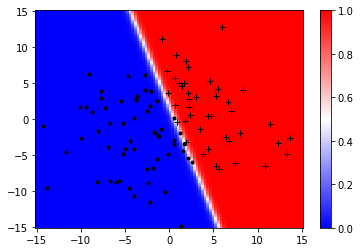

In [8]:
#fill with model value
h_grid = 1./(1.+np.exp(-1.*1.5*(x2_grid - (2. - 3.*x1_grid))))

#draw 2d mesh
plt.pcolormesh(x1_grid, x2_grid, h_grid, cmap = 'bwr', shading='auto')
plt.colorbar()

plt.plot(x1_pos, x2_pos, 'k+')
plt.plot(x1_neg, x2_neg, 'k.')

plt.show()

This is a neural network! No hidden layers, two inputs, one output neuron with a sigmoid activation.

https://playground.tensorflow.org/

How do we train? How do we handle more complicated data?

In [72]:
import h5py
import pandas as pd

treename = 'l1pf_egm_reg'

VARS = ['pt', 'eta', 'phi', 'energy',
  'e2x2', 'e2x5', 'e3x5', 'e5x5', 'e2x2_div_e2x5', 'e2x2_div_e5x5', 'e2x5_div_e5x5',#7
  'hoE', 'bremStrength', 'ecalIso', 'crystalCount',#4
  'lowerSideLobePt','upperSideLobePt',#2
  'phiStripContiguous0', 'phiStripOneHole0', 'phiStripContiguous3p', 'phiStripOneHole3p',#4
  'sihih','sipip','sigetaeta','sigphiphi','sigetaphi',#5
  'e_m2_m2','e_m2_m1','e_m2_p0','e_m2_p1','e_m2_p2',
  'e_m1_m2','e_m1_m1','e_m1_p0','e_m1_p1','e_m1_p2',
  'e_p0_m2','e_p0_m1','e_p0_p0','e_p0_p1','e_p0_p2',
  'e_p1_m2','e_p1_m1','e_p1_p0','e_p1_p1','e_p1_p2',
  'e_p2_m2','e_p2_m1','e_p2_p0','e_p2_p1','e_p2_p2',#^25
  'h_m1_m1','h_m1_p0','h_m1_p1',
  'h_p0_m1','h_p0_p0','h_p0_p1',
  'h_p1_m1','h_p1_p0','h_p1_p1',#^9
  'gen_match']

filename = 'xtalTuple_TTbar_PU0.z'

h5file = h5py.File(filename, 'r') # open read-only
params = h5file[treename][()]

df = pd.DataFrame(params,columns=VARS)

TODROP = [
  'e2x2_div_e2x5', 'e2x2_div_e5x5', 'e2x5_div_e5x5',#7
  'e_m2_m2','e_m2_m1','e_m2_p0','e_m2_p1','e_m2_p2',
  'e_m1_m2','e_m1_m1','e_m1_p0','e_m1_p1','e_m1_p2',
  'e_p0_m2','e_p0_m1','e_p0_p0','e_p0_p1','e_p0_p2',
  'e_p1_m2','e_p1_m1','e_p1_p0','e_p1_p1','e_p1_p2',
  'e_p2_m2','e_p2_m1','e_p2_p0','e_p2_p1','e_p2_p2',#^25
  'h_m1_m1','h_m1_p0','h_m1_p1',
  'h_p0_m1','h_p0_p0','h_p0_p1',
  'h_p1_m1','h_p1_p0','h_p1_p1',#^9
]

df = df.drop(TODROP, axis=1) #remove custom variables

for ie in ['e2x2', 'e2x5', 'e3x5', 'e5x5']:
    df[ie] /= df['energy']


df['isPU'] = pd.Series(df['gen_match']==0, index=df.index, dtype='i4')
df['isEG'] = pd.Series(df['gen_match']==1, index=df.index, dtype='i4')

MINPT = 0.5
MAXPT = 100.
df = df.loc[(df['pt']>MINPT) & (df['pt']<MAXPT) & (abs(df['eta'])<1.3)]
df.fillna(0., inplace=True)

df0 = df[df['gen_match']==0].head(100000)
df1 = df[df['gen_match']==1].head(10000)

df = pd.concat([df0, df1], ignore_index=True)
df = df.sample(frac=1).reset_index(drop=True)

print(df)
print(sum(df['gen_match']==0))
print(sum(df['gen_match']==1))


               pt       eta       phi     energy      e2x2      e2x5  \
0       35.704041 -0.507706  2.878068  40.405376  0.535196  0.760296   
1       20.274231  0.900737 -0.411295  29.070072  0.629863  0.629863   
2       18.971325  0.098096 -2.170223  19.062677  0.658842  0.711494   
3       18.823902 -0.289867  1.482410  19.620277  0.358927  0.485261   
4       28.542179 -1.269182  2.744906  54.786751  0.593837  0.650484   
...           ...       ...       ...        ...       ...       ...   
109995  12.949862 -0.250036 -1.249817  13.356775  0.673518  0.673518   
109996   8.815984 -0.998042 -2.532606  13.583519  0.651521  0.651521   
109997  22.573345 -0.594872  0.616564  26.686574  0.747590  0.786319   
109998  13.723881  0.089802 -1.312470  13.779256  0.345876  0.345876   
109999  12.482843  0.930081 -2.937245  18.282600  0.700625  0.740990   

            e3x5      e5x5       hoE  bremStrength  ...  phiStripContiguous3p  \
0       0.833223  0.872372  2.306325      1.000000  ..

['pt', 'eta', 'phi', 'energy', 'e2x2', 'e2x5', 'e3x5', 'e5x5', 'hoE', 'bremStrength', 'ecalIso', 'crystalCount', 'lowerSideLobePt', 'upperSideLobePt', 'phiStripContiguous0', 'phiStripOneHole0', 'phiStripContiguous3p', 'phiStripOneHole3p', 'sihih', 'sipip', 'sigetaeta', 'sigphiphi', 'sigetaphi', 'gen_match', 'isPU', 'isEG']


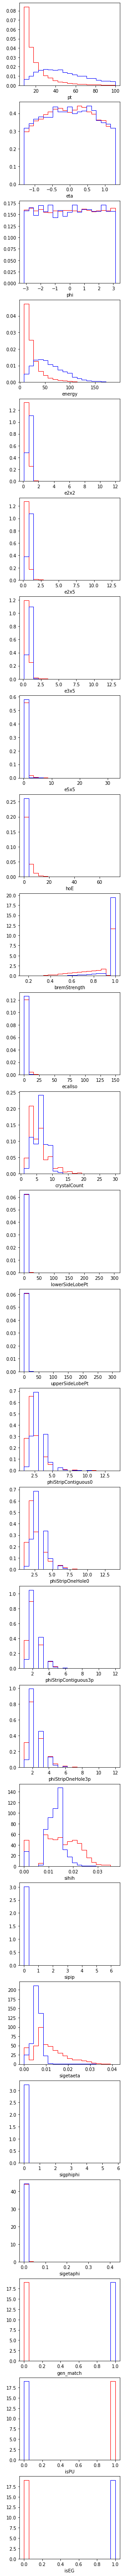

In [113]:
col_names = list(df.columns)
print(col_names)

fig, axs = plt.subplots(len(col_names),1,figsize=(4,4*len(col_names)))
for ix,ax in enumerate(axs):
    ax.hist(df[col_names[ix]][df['gen_match']==0],bins=np.linspace(np.min(df[col_names[ix]]),np.max(df[col_names[ix]]),20),histtype='step',color='r',density=True)
    ax.hist(df[col_names[ix]][df['gen_match']==1],bins=np.linspace(np.min(df[col_names[ix]]),np.max(df[col_names[ix]]),20),histtype='step',color='b',density=True)
    ax.set_xlabel(col_names[ix])

plt.show()

In [93]:
fig, axs = plt.subplots(len(col_names)-4,len(col_names)-4,figsize=(8*len(col_names),8*len(col_names)))
for ix in range(len(col_names)-3):
    for iy in range(ix):
        axs[ix-1,iy].plot(df[col_names[ix]][df['gen_match']==0],df[col_names[iy]][df['gen_match']==0],'r+')
        axs[ix-1,iy].plot(df[col_names[ix]][df['gen_match']==1],df[col_names[iy]][df['gen_match']==1],'b.')
        axs[ix-1,iy].set_xlabel(col_names[ix])
        axs[ix-1,iy].set_ylabel(col_names[iy])

plt.show()

Lets make a simple logistic regression network on this data to differentiate between pileup data (PU) and electron and photons (EG).

In [76]:
from keras import regularizers
from keras.models import Sequential, Model
from keras.optimizers import SGD
from keras.layers import Input, Activation, Dense, Dropout, BatchNormalization
from keras.wrappers.scikit_learn import KerasRegressor
from keras.losses import binary_crossentropy
from keras.callbacks import EarlyStopping
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

dataset = df.values

X = dataset[:,4:-3]
#last 3 columns are labels
ninputs = len(list(df.columns))-3-4

Y = dataset[:,-1:]
#last column will be used for the label

from sklearn.model_selection import train_test_split
X_train_val, X_test, Y_train_val, Y_test = train_test_split(X, Y, test_size=0.3, random_state=7)
#splits dataset into 70% training and 30% testing

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train_val)
X_train_val = scaler.transform(X_train_val)
X_test = scaler.transform(X_test)
#transform each input variable to have mean 0 and std 1

In [96]:
print(X_test.shape)
print(Y_test.shape)

(110000, 19)
(110000, 1)


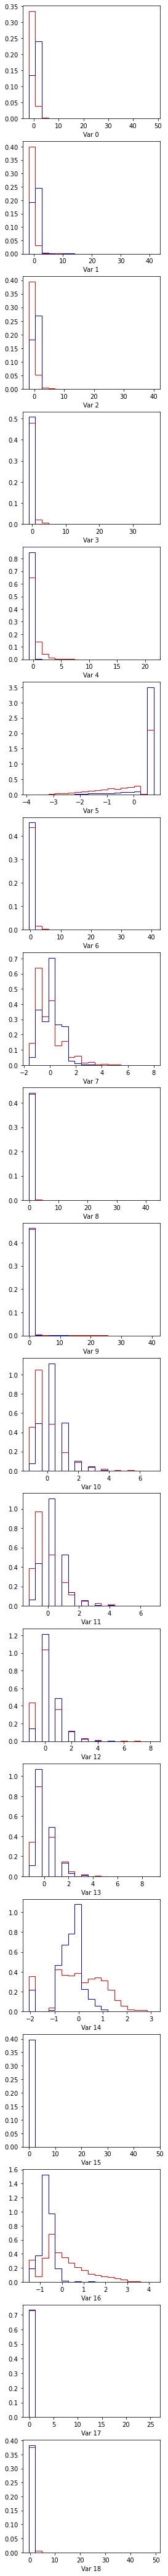

In [110]:
nvars = X_test.shape[1]
fig, axs = plt.subplots(nvars,1,figsize=(4,4*nvars))
for ix,ax in enumerate(axs):
    ax.hist(X_test[Y_test[:,0]==0,ix],bins=np.linspace(np.min(X_test[:,ix]),np.max(X_test[:,ix]),20),histtype='step',color='r',density=True)
    ax.hist(X_test[Y_test[:,0]==1,ix],bins=np.linspace(np.min(X_test[:,ix]),np.max(X_test[:,ix]),20),histtype='step',color='b',density=True)
    ax.set_xlabel("Var %i"%ix)

plt.show()

In [77]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

inputs = Input(shape=(ninputs,))
outputs = Dense(1, kernel_initializer='normal', activation='sigmoid')(inputs)

model_lr = Model(inputs=inputs,outputs=outputs,name='logistic_regression')

model_lr.compile(loss=binary_crossentropy, optimizer='adam',metrics=['accuracy'])
model_lr.summary()

Model: "logistic_regression"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_21 (InputLayer)        (None, 19)                0         
_________________________________________________________________
dense_67 (Dense)             (None, 1)                 20        
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


In [78]:
# model checkpoint callback
# this saves our model architecture + parameters into an h5 file
from keras.callbacks import ModelCheckpoint
model_checkpoint = ModelCheckpoint('lr_model.h5', monitor='val_loss',
                                   verbose=0, save_best_only=True,
                                   save_weights_only=False, mode='auto',
                                   period=1)

# Train classifier
history_lr = model_lr.fit(X_train_val,
                    Y_train_val,
                    epochs=1000,
                    batch_size=512,
                    verbose=1, # switch to 1 for more verbosity 
                    callbacks=[early_stopping, model_checkpoint],
                    validation_split=0.3, #use 30% of the training data for validation
                   )

Y_test_predict_lr = model_lr.predict(X_test)

print(Y_test_predict_lr[:10])
print(Y_test[:10])

Train on 53900 samples, validate on 23100 samples
Epoch 1/1000
53900/53900 [==============================] - 1s 10us/step - loss: 0.6578 - accuracy: 0.6281 - val_loss: 0.6291 - val_accuracy: 0.6757
Epoch 2/1000
53900/53900 [==============================] - 0s 3us/step - loss: 0.6089 - accuracy: 0.7113 - val_loss: 0.5876 - val_accuracy: 0.7587
Epoch 3/1000
53900/53900 [==============================] - 0s 3us/step - loss: 0.5706 - accuracy: 0.7892 - val_loss: 0.5521 - val_accuracy: 0.8312
Epoch 4/1000
53900/53900 [==============================] - 0s 3us/step - loss: 0.5368 - accuracy: 0.8535 - val_loss: 0.5199 - val_accuracy: 0.8796
Epoch 5/1000
53900/53900 [==============================] - 0s 4us/step - loss: 0.5064 - accuracy: 0.8901 - val_loss: 0.4911 - val_accuracy: 0.9039
Epoch 6/1000
53900/53900 [==============================] - 0s 3us/step - loss: 0.4792 - accuracy: 0.9094 - val_loss: 0.4651 - val_accuracy: 0.9147
Epoch 7/1000
53900/53900 [==============================] - 0

Epoch 56/1000
53900/53900 [==============================] - 0s 3us/step - loss: 0.1769 - accuracy: 0.9325 - val_loss: 0.1737 - val_accuracy: 0.9334
Epoch 57/1000
53900/53900 [==============================] - 0s 3us/step - loss: 0.1757 - accuracy: 0.9334 - val_loss: 0.1724 - val_accuracy: 0.9332
Epoch 58/1000
53900/53900 [==============================] - 0s 3us/step - loss: 0.1745 - accuracy: 0.9330 - val_loss: 0.1712 - val_accuracy: 0.9334
Epoch 59/1000
53900/53900 [==============================] - 0s 3us/step - loss: 0.1733 - accuracy: 0.9343 - val_loss: 0.1701 - val_accuracy: 0.9340
Epoch 60/1000
53900/53900 [==============================] - 0s 3us/step - loss: 0.1722 - accuracy: 0.9340 - val_loss: 0.1690 - val_accuracy: 0.9351
Epoch 61/1000
53900/53900 [==============================] - 0s 3us/step - loss: 0.1710 - accuracy: 0.9349 - val_loss: 0.1680 - val_accuracy: 0.9359
Epoch 62/1000
53900/53900 [==============================] - 0s 3us/step - loss: 0.1700 - accuracy: 0.9356

Epoch 111/1000
53900/53900 [==============================] - 0s 3us/step - loss: 0.1407 - accuracy: 0.9488 - val_loss: 0.1391 - val_accuracy: 0.9496
Epoch 112/1000
53900/53900 [==============================] - 0s 3us/step - loss: 0.1403 - accuracy: 0.9492 - val_loss: 0.1388 - val_accuracy: 0.9497
Epoch 113/1000
53900/53900 [==============================] - 0s 3us/step - loss: 0.1401 - accuracy: 0.9494 - val_loss: 0.1386 - val_accuracy: 0.9500
Epoch 114/1000
53900/53900 [==============================] - 0s 3us/step - loss: 0.1398 - accuracy: 0.9492 - val_loss: 0.1384 - val_accuracy: 0.9504
Epoch 115/1000
53900/53900 [==============================] - 0s 3us/step - loss: 0.1395 - accuracy: 0.9497 - val_loss: 0.1381 - val_accuracy: 0.9503
Epoch 116/1000
53900/53900 [==============================] - 0s 3us/step - loss: 0.1392 - accuracy: 0.9499 - val_loss: 0.1378 - val_accuracy: 0.9503
Epoch 117/1000
53900/53900 [==============================] - 0s 3us/step - loss: 0.1390 - accuracy:

Epoch 220/1000
53900/53900 [==============================] - 0s 3us/step - loss: 0.1266 - accuracy: 0.9563 - val_loss: 0.1272 - val_accuracy: 0.9576
Epoch 221/1000
53900/53900 [==============================] - 0s 3us/step - loss: 0.1265 - accuracy: 0.9560 - val_loss: 0.1272 - val_accuracy: 0.9576
Epoch 222/1000
53900/53900 [==============================] - 0s 3us/step - loss: 0.1265 - accuracy: 0.9562 - val_loss: 0.1272 - val_accuracy: 0.9577
Epoch 223/1000
53900/53900 [==============================] - 0s 3us/step - loss: 0.1264 - accuracy: 0.9565 - val_loss: 0.1271 - val_accuracy: 0.9578
Epoch 224/1000
53900/53900 [==============================] - 0s 3us/step - loss: 0.1263 - accuracy: 0.9565 - val_loss: 0.1271 - val_accuracy: 0.9577
Epoch 225/1000
53900/53900 [==============================] - 0s 3us/step - loss: 0.1263 - accuracy: 0.9562 - val_loss: 0.1270 - val_accuracy: 0.9577
Epoch 226/1000
53900/53900 [==============================] - 0s 3us/step - loss: 0.1262 - accuracy:

Epoch 329/1000
53900/53900 [==============================] - 0s 3us/step - loss: 0.1228 - accuracy: 0.9592 - val_loss: 0.1244 - val_accuracy: 0.9595
Epoch 330/1000
53900/53900 [==============================] - 0s 3us/step - loss: 0.1227 - accuracy: 0.9590 - val_loss: 0.1244 - val_accuracy: 0.9594
Epoch 331/1000
53900/53900 [==============================] - 0s 3us/step - loss: 0.1227 - accuracy: 0.9594 - val_loss: 0.1244 - val_accuracy: 0.9596
Epoch 332/1000
53900/53900 [==============================] - 0s 3us/step - loss: 0.1227 - accuracy: 0.9589 - val_loss: 0.1243 - val_accuracy: 0.9596
Epoch 333/1000
53900/53900 [==============================] - 0s 3us/step - loss: 0.1227 - accuracy: 0.9592 - val_loss: 0.1243 - val_accuracy: 0.9595
Epoch 334/1000
53900/53900 [==============================] - 0s 3us/step - loss: 0.1227 - accuracy: 0.9593 - val_loss: 0.1243 - val_accuracy: 0.9596
Epoch 335/1000
53900/53900 [==============================] - 0s 3us/step - loss: 0.1226 - accuracy:

Epoch 438/1000
53900/53900 [==============================] - 0s 3us/step - loss: 0.1210 - accuracy: 0.9602 - val_loss: 0.1231 - val_accuracy: 0.9604
[[2.7848542e-02]
 [2.0542741e-04]
 [8.0466270e-07]
 [0.0000000e+00]
 [7.0512295e-05]
 [5.4678321e-04]
 [4.4658780e-04]
 [2.0080805e-04]
 [2.2873282e-04]
 [1.2378693e-03]]
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


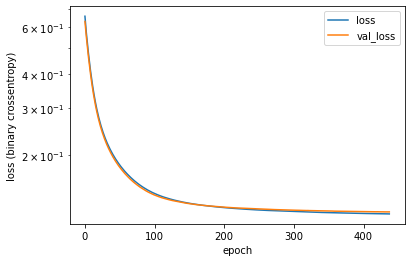

In [79]:
plt.semilogy(history_lr.history['loss'], label='loss')
plt.semilogy(history_lr.history['val_loss'], label='val_loss')
plt.legend(loc="upper right")
plt.xlabel('epoch')
plt.ylabel('loss (binary crossentropy)')
plt.show()

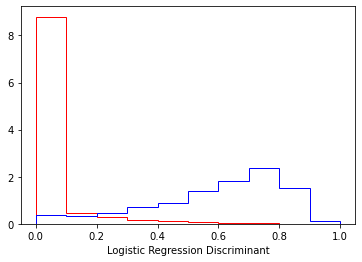

In [84]:
plt.hist(Y_test_predict_lr[Y_test==0],histtype='step',color='r',density=True)
plt.hist(Y_test_predict_lr[Y_test==1],histtype='step',color='b',density=True)
plt.xlabel('Logistic Regression Discriminant')
plt.show()

In [81]:
inputs = Input(shape=(ninputs,))
x = Dense(30, kernel_initializer='normal', activation='relu')(inputs)
x = Dense(10, kernel_initializer='normal', activation='relu')(x)
outputs = Dense(1, kernel_initializer='normal', activation='sigmoid')(x)

model_mlp_2layer = Model(inputs=inputs,outputs=outputs,name='mlp_2layer')

model_mlp_2layer.compile(loss=binary_crossentropy, optimizer='adam',metrics=['accuracy'])
model_mlp_2layer.summary()

Model: "mlp_2layer"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_22 (InputLayer)        (None, 19)                0         
_________________________________________________________________
dense_68 (Dense)             (None, 30)                600       
_________________________________________________________________
dense_69 (Dense)             (None, 10)                310       
_________________________________________________________________
dense_70 (Dense)             (None, 1)                 11        
Total params: 921
Trainable params: 921
Non-trainable params: 0
_________________________________________________________________


In [82]:
# model checkpoint callback
# this saves our model architecture + parameters into an h5 file
from keras.callbacks import ModelCheckpoint
model_checkpoint = ModelCheckpoint('mlp_2layer_model.h5', monitor='val_loss',
                                   verbose=0, save_best_only=True,
                                   save_weights_only=False, mode='auto',
                                   period=1)

# Train classifier
history_mlp_2layer = model_mlp_2layer.fit(X_train_val,
                    Y_train_val,
                    epochs=1000,
                    batch_size=512,
                    verbose=1, # switch to 1 for more verbosity 
                    callbacks=[early_stopping, model_checkpoint],
                    validation_split=0.3, #use 30% of the training data for validation
                   )

Y_test_predict_mlp_2layer = model_mlp_2layer.predict(X_test)

print(Y_test_predict_mlp_2layer[:10])
print(Y_test[:10])

Train on 53900 samples, validate on 23100 samples
Epoch 1/1000
53900/53900 [==============================] - 1s 13us/step - loss: 0.5348 - accuracy: 0.9071 - val_loss: 0.2646 - val_accuracy: 0.9113
Epoch 2/1000
53900/53900 [==============================] - 0s 3us/step - loss: 0.2146 - accuracy: 0.9084 - val_loss: 0.1818 - val_accuracy: 0.9113
Epoch 3/1000
53900/53900 [==============================] - 0s 4us/step - loss: 0.1734 - accuracy: 0.9084 - val_loss: 0.1547 - val_accuracy: 0.9113
Epoch 4/1000
53900/53900 [==============================] - 0s 3us/step - loss: 0.1488 - accuracy: 0.9261 - val_loss: 0.1294 - val_accuracy: 0.9516
Epoch 5/1000
53900/53900 [==============================] - 0s 3us/step - loss: 0.1234 - accuracy: 0.9548 - val_loss: 0.1106 - val_accuracy: 0.9577
Epoch 6/1000
53900/53900 [==============================] - 0s 3us/step - loss: 0.1108 - accuracy: 0.9581 - val_loss: 0.1033 - val_accuracy: 0.9603
Epoch 7/1000
53900/53900 [==============================] - 0

Epoch 56/1000
53900/53900 [==============================] - 0s 5us/step - loss: 0.0753 - accuracy: 0.9726 - val_loss: 0.0763 - val_accuracy: 0.9719
Epoch 57/1000
53900/53900 [==============================] - 0s 4us/step - loss: 0.0756 - accuracy: 0.9728 - val_loss: 0.0761 - val_accuracy: 0.9719
Epoch 58/1000
53900/53900 [==============================] - 0s 5us/step - loss: 0.0750 - accuracy: 0.9725 - val_loss: 0.0762 - val_accuracy: 0.9723
Epoch 59/1000
53900/53900 [==============================] - 0s 3us/step - loss: 0.0754 - accuracy: 0.9728 - val_loss: 0.0770 - val_accuracy: 0.9716
Epoch 60/1000
53900/53900 [==============================] - 0s 3us/step - loss: 0.0749 - accuracy: 0.9730 - val_loss: 0.0765 - val_accuracy: 0.9720
Epoch 61/1000
53900/53900 [==============================] - 0s 3us/step - loss: 0.0748 - accuracy: 0.9733 - val_loss: 0.0757 - val_accuracy: 0.9723
Epoch 62/1000
53900/53900 [==============================] - 0s 3us/step - loss: 0.0747 - accuracy: 0.9731

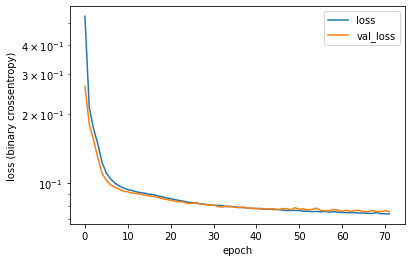

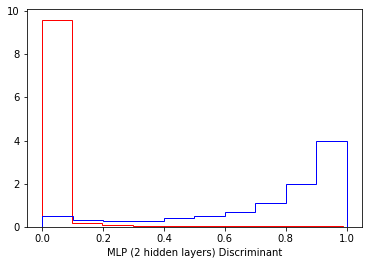

In [85]:
plt.semilogy(history_mlp_2layer.history['loss'], label='loss')
plt.semilogy(history_mlp_2layer.history['val_loss'], label='val_loss')
plt.legend(loc="upper right")
plt.xlabel('epoch')
plt.ylabel('loss (binary crossentropy)')
plt.show()

plt.hist(Y_test_predict_mlp_2layer[Y_test==0],histtype='step',color='r',density=True)
plt.hist(Y_test_predict_mlp_2layer[Y_test==1],histtype='step',color='b',density=True)
plt.xlabel('MLP (2 hidden layers) Discriminant')
plt.show()

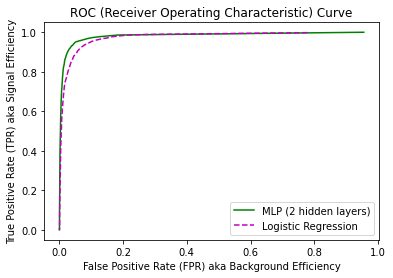

In [86]:
def compute_ROC(labels, predicts, npts=101):
    cutvals = np.linspace(0.,1.,num=npts)
    tot0 = float(len(labels[labels==0]))
    tot1 = float(len(labels[labels==1]))
    tpr = []
    fpr = []
    for c in cutvals:
        fpr.append(float(len(predicts[(labels==0) & (predicts>c)]))/tot0)
        tpr.append(float(len(predicts[(labels==1) & (predicts>c)]))/tot1)
    
    return np.array(fpr),np.array(tpr)

mlp_2layer_rocpts = compute_ROC(Y_test,Y_test_predict_mlp_2layer)
lr_rocpts = compute_ROC(Y_test,Y_test_predict_lr)

plt.plot(mlp_2layer_rocpts[0],mlp_2layer_rocpts[1],'g-',label="MLP (2 hidden layers)")
plt.plot(lr_rocpts[0],lr_rocpts[1],'m--',label="Logistic Regression")
plt.title("ROC (Receiver Operating Characteristic) Curve")
plt.xlabel("False Positive Rate (FPR) aka Background Efficiency")
plt.ylabel("True Positive Rate (TPR) aka Signal Efficiency")
plt.legend(loc="lower right")
plt.show()

In [87]:
l2reg = 0.000001

inputs = Input(shape=(ninputs,))
x = Dense(50, kernel_initializer='normal', activity_regularizer=regularizers.l2(l2reg), activation='relu')(inputs)
x = Dense(30, kernel_initializer='normal', activity_regularizer=regularizers.l2(l2reg), activation='relu')(x)
x = Dense(10, kernel_initializer='normal', activity_regularizer=regularizers.l2(l2reg), activation='relu')(x)
outputs = Dense(1, kernel_initializer='normal', activity_regularizer=regularizers.l2(l2reg), activation='sigmoid')(x)

model_mlp_3layer = Model(inputs=inputs,outputs=outputs,name='mlp_3layer')

model_mlp_3layer.compile(loss=binary_crossentropy, optimizer='adam',metrics=['accuracy'])
model_mlp_3layer.summary()

# model checkpoint callback
# this saves our model architecture + parameters into an h5 file
from keras.callbacks import ModelCheckpoint
model_checkpoint = ModelCheckpoint('mlp_3layer_model.h5', monitor='val_loss',
                                   verbose=0, save_best_only=True,
                                   save_weights_only=False, mode='auto',
                                   period=1)

# Train classifier
history_mlp_3layer = model_mlp_3layer.fit(X_train_val,
                    Y_train_val,
                    epochs=1000,
                    batch_size=512,
                    verbose=1, # switch to 1 for more verbosity 
                    callbacks=[early_stopping, model_checkpoint],
                    validation_split=0.3, #use 30% of the training data for validation
                   )

Y_test_predict_mlp_3layer = model_mlp_3layer.predict(X_test)

print(Y_test_predict_mlp_3layer[:10])
print(Y_test[:10])

Model: "mlp_3layer"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_23 (InputLayer)        (None, 19)                0         
_________________________________________________________________
dense_71 (Dense)             (None, 50)                1000      
_________________________________________________________________
dense_72 (Dense)             (None, 30)                1530      
_________________________________________________________________
dense_73 (Dense)             (None, 10)                310       
_________________________________________________________________
dense_74 (Dense)             (None, 1)                 11        
Total params: 2,851
Trainable params: 2,851
Non-trainable params: 0
_________________________________________________________________
Train on 53900 samples, validate on 23100 samples
Epoch 1/1000
53900/53900 [==============================] - 1s 14us/st

Epoch 49/1000
53900/53900 [==============================] - 0s 4us/step - loss: 0.0775 - accuracy: 0.9732 - val_loss: 0.0824 - val_accuracy: 0.9713
[[0.02481598]
 [0.00131023]
 [0.00120738]
 [0.00109357]
 [0.00366396]
 [0.00150868]
 [0.00075185]
 [0.00391629]
 [0.00365058]
 [0.00111082]]
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


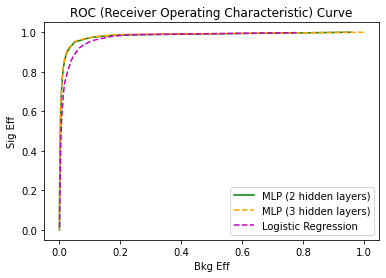

In [88]:
mlp_2layer_rocpts = compute_ROC(Y_test,Y_test_predict_mlp_2layer)
mlp_3layer_rocpts = compute_ROC(Y_test,Y_test_predict_mlp_3layer)
lr_rocpts = compute_ROC(Y_test,Y_test_predict_lr)

plt.plot(mlp_2layer_rocpts[0],mlp_2layer_rocpts[1],'g-',label="MLP (2 hidden layers)")
plt.plot(mlp_3layer_rocpts[0],mlp_3layer_rocpts[1],'--',color='orange',label="MLP (3 hidden layers)")
plt.plot(lr_rocpts[0],lr_rocpts[1],'m--',label="Logistic Regression")
plt.title("ROC (Receiver Operating Characteristic) Curve")
plt.xlabel("Bkg Eff")
plt.ylabel("Sig Eff")
plt.legend(loc="lower right")
plt.show()

/Users/drankin/miniconda3/envs/8.s05_dl/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
/Users/drankin/miniconda3/envs/8.s05_dl/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  
/Users/drankin/miniconda3/envs/8.s05_dl/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys


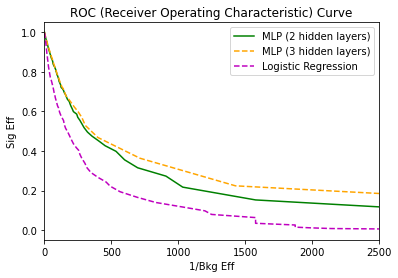

In [90]:
mlp_2layer_rocpts = compute_ROC(Y_test,Y_test_predict_mlp_2layer,101)
mlp_3layer_rocpts = compute_ROC(Y_test,Y_test_predict_mlp_3layer,101)
lr_rocpts = compute_ROC(Y_test,Y_test_predict_lr,101)

plt.plot(1./mlp_2layer_rocpts[0],mlp_2layer_rocpts[1],'g-',label="MLP (2 hidden layers)")
plt.plot(1./mlp_3layer_rocpts[0],mlp_3layer_rocpts[1],'--',color='orange',label="MLP (3 hidden layers)")
plt.plot(1./lr_rocpts[0],lr_rocpts[1],'m--',label="Logistic Regression")
plt.title("ROC (Receiver Operating Characteristic) Curve")
plt.xlabel("1/Bkg Eff")
plt.xlim([-1, 2500])
plt.ylabel("Sig Eff")
plt.legend(loc="upper right")
plt.show()

In [91]:
inputs = Input(shape=(ninputs,))
x = Dense(50, kernel_initializer='normal', activation='relu')(inputs)
x = BatchNormalization()(x)
x = Dropout(0.1)(x)
x = Dense(30, kernel_initializer='normal', activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.1)(x)
x = Dense(10, kernel_initializer='normal', activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.1)(x)
outputs = Dense(1, kernel_initializer='normal', activation='sigmoid')(x)

model_mlp_3layer_dropbn = Model(inputs=inputs,outputs=outputs,name='mlp_3layer_dropbn')

model_mlp_3layer_dropbn.compile(loss=binary_crossentropy, optimizer='adam',metrics=['accuracy'])
model_mlp_3layer_dropbn.summary()

# model checkpoint callback
# this saves our model architecture + parameters into an h5 file
from keras.callbacks import ModelCheckpoint
model_checkpoint = ModelCheckpoint('mlp_3layer_dropbn_model.h5', monitor='val_loss',
                                   verbose=0, save_best_only=True,
                                   save_weights_only=False, mode='auto',
                                   period=1)

# Train classifier
history_mlp_3layer_dropbn = model_mlp_3layer_dropbn.fit(X_train_val,
                    Y_train_val,
                    epochs=1000,
                    batch_size=512,
                    verbose=1, # switch to 1 for more verbosity 
                    callbacks=[early_stopping, model_checkpoint],
                    validation_split=0.3, #use 30% of the training data for validation
                   )

Y_test_predict_mlp_3layer_dropbn = model_mlp_3layer_dropbn.predict(X_test)

print(Y_test_predict_mlp_3layer_dropbn[:10])
print(Y_test[:10])

Model: "mlp_3layer_dropbn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_24 (InputLayer)        (None, 19)                0         
_________________________________________________________________
dense_75 (Dense)             (None, 50)                1000      
_________________________________________________________________
batch_normalization_10 (Batc (None, 50)                200       
_________________________________________________________________
dropout_13 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_76 (Dense)             (None, 30)                1530      
_________________________________________________________________
batch_normalization_11 (Batc (None, 30)                120       
_________________________________________________________________
dropout_14 (Dropout)         (None, 30)          

/Users/drankin/miniconda3/envs/8.s05_dl/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
/Users/drankin/miniconda3/envs/8.s05_dl/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  


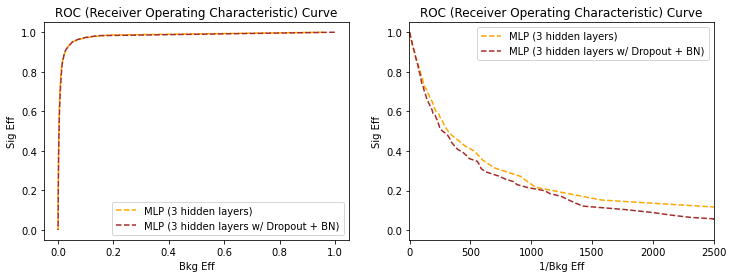

In [92]:
mlp_3layer_rocpts = compute_ROC(Y_test,Y_test_predict_mlp_2layer,101)
mlp_3layer_dropbn_rocpts = compute_ROC(Y_test,Y_test_predict_mlp_3layer_dropbn,101)

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,4))

ax1.plot(mlp_3layer_rocpts[0],mlp_3layer_rocpts[1],'--',color='orange',label="MLP (3 hidden layers)")
ax1.plot(mlp_3layer_dropbn_rocpts[0],mlp_3layer_dropbn_rocpts[1],'--',color='brown',label="MLP (3 hidden layers w/ Dropout + BN)")
ax1.set_title("ROC (Receiver Operating Characteristic) Curve")
ax1.set_xlabel("Bkg Eff")
ax1.set_ylabel("Sig Eff")
ax1.legend(loc="lower right")

ax2.plot(1./mlp_3layer_rocpts[0],mlp_3layer_rocpts[1],'--',color='orange',label="MLP (3 hidden layers)")
ax2.plot(1./mlp_3layer_dropbn_rocpts[0],mlp_3layer_dropbn_rocpts[1],'--',color='brown',label="MLP (3 hidden layers w/ Dropout + BN)")
ax2.set_title("ROC (Receiver Operating Characteristic) Curve")
ax2.set_xlabel("1/Bkg Eff")
ax2.set_xlim([-1, 2500])
ax2.set_ylabel("Sig Eff")
ax2.legend(loc="upper right")

plt.show()